In [1]:
# nlp_amazon_reviews.py
import spacy
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Load spaCy model (download with: python -m spacy download en_core_web_sm)
print("Loading spaCy model...")
try:
    nlp = spacy.load("en_core_web_sm")
    print("✅ spaCy model loaded successfully!")
except OSError:
    print("❌ spaCy model not found. Please install with: python -m spacy download en_core_web_sm")
    exit()


Loading spaCy model...
✅ spaCy model loaded successfully!


Analyzing 10 product reviews...

=== NAMED ENTITY RECOGNITION ===

Review 1: 'I love my new iPhone 13! The camera quality is ama...'
  - 13 (CARDINAL): Numerals that do not fall under another type
  - Apple (ORG): Companies, agencies, institutions, etc.

Review 2: 'This Samsung Galaxy S21 is terrible. The battery l...'
  - Samsung (ORG): Companies, agencies, institutions, etc.

Review 3: 'The Nike Air Max shoes are comfortable but overpri...'
  - Nike (ORG): Companies, agencies, institutions, etc.

Review 4: 'Amazon Echo Dot is fantastic! Great sound quality ...'
  - Amazon (ORG): Companies, agencies, institutions, etc.
  - Echo Dot (PERSON): People, including fictional
  - Alexa (ORG): Companies, agencies, institutions, etc.

Review 5: 'Disappointed with my MacBook Pro. Apple products a...'
  - MacBook Pro (ORG): Companies, agencies, institutions, etc.
  - Apple (ORG): Companies, agencies, institutions, etc.

Review 6: 'The Sony WH-1000XM4 headphones have excellent nois...'
  - Sony (

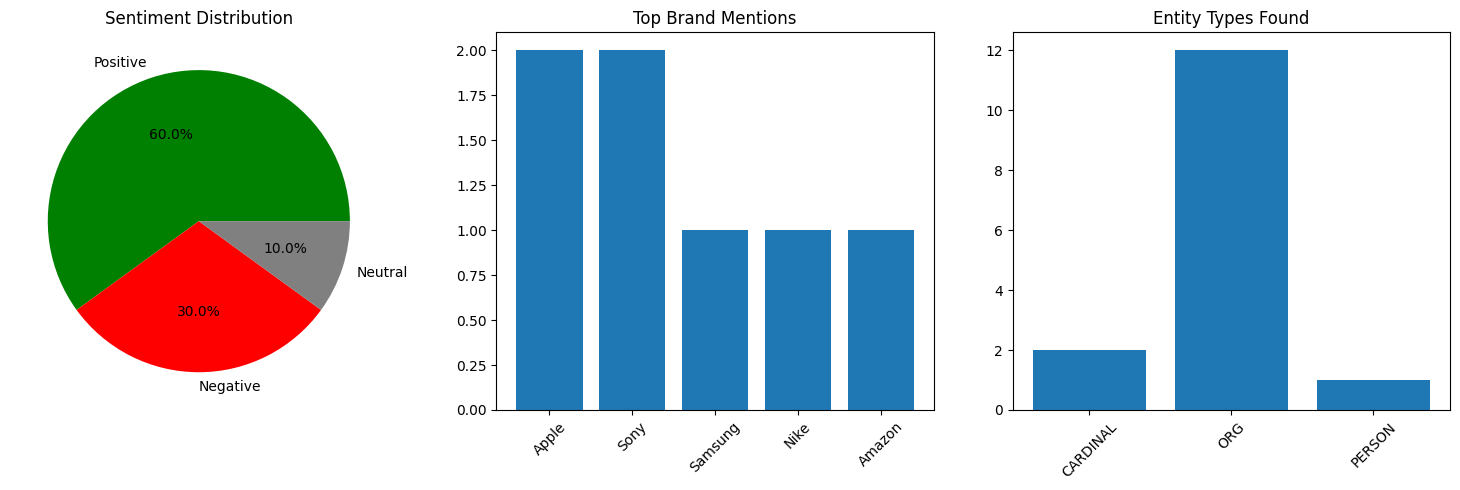

In [2]:
# Sample Amazon product reviews (in real scenario, load from dataset)
sample_reviews = [
    "I love my new iPhone 13! The camera quality is amazing and Apple really outdid themselves.",
    "This Samsung Galaxy S21 is terrible. The battery life is horrible and Samsung should fix this.",
    "The Nike Air Max shoes are comfortable but overpriced. Nike always charges too much.",
    "Amazon Echo Dot is fantastic! Great sound quality and Alexa responds quickly.",
    "Disappointed with my MacBook Pro. Apple products are getting worse and this laptop is slow.",
    "The Sony WH-1000XM4 headphones have excellent noise cancellation. Sony makes great audio products.",
    "This Dell laptop crashes constantly. Dell customer service is also unhelpful.",
    "Love my AirPods Pro! Apple continues to innovate in wireless audio technology.",
    "The Google Pixel 6 camera is outstanding. Google's computational photography is impressive.",
    "This Microsoft Surface Pro is perfect for work. Microsoft really improved the design."
]

print(f"Analyzing {len(sample_reviews)} product reviews...")

# Named Entity Recognition (NER)
print("\n=== NAMED ENTITY RECOGNITION ===")

all_entities = []
product_entities = []
brand_entities = []

for i, review in enumerate(sample_reviews):
    doc = nlp(review)

    print(f"\nReview {i+1}: '{review[:50]}...'")

    review_entities = []
    for ent in doc.ents:
        entity_info = {
            'text': ent.text,
            'label': ent.label_,
            'description': spacy.explain(ent.label_),
            'review_index': i
        }

        all_entities.append(entity_info)
        review_entities.append(entity_info)

        # Categorize entities
        if ent.label_ in ['PRODUCT', 'ORG']:  # Organizations often represent brands
            brand_entities.append(ent.text)

        print(f"  - {ent.text} ({ent.label_}): {spacy.explain(ent.label_)}")

    if not review_entities:
        print("  - No entities found")

# Extract and count brands/products
brand_counter = Counter(brand_entities)
print(f"\n=== BRAND/PRODUCT MENTIONS ===")
print("Most mentioned brands:")
for brand, count in brand_counter.most_common():
    print(f"  - {brand}: {count} mentions")

# Rule-based Sentiment Analysis
print(f"\n=== SENTIMENT ANALYSIS ===")

# Define sentiment keywords
positive_keywords = [
    'love', 'amazing', 'fantastic', 'great', 'excellent', 'outstanding',
    'perfect', 'comfortable', 'impressive', 'good', 'best', 'wonderful'
]

negative_keywords = [
    'terrible', 'horrible', 'disappointed', 'worst', 'bad', 'awful',
    'hate', 'crashes', 'slow', 'unhelpful', 'overpriced', 'expensive'
]

sentiment_results = []

for i, review in enumerate(sample_reviews):
    doc = nlp(review.lower())

    # Count sentiment words
    positive_count = sum(1 for token in doc if token.text in positive_keywords)
    negative_count = sum(1 for token in doc if token.text in negative_keywords)

    # Determine sentiment
    if positive_count > negative_count:
        sentiment = 'Positive'
        score = positive_count - negative_count
    elif negative_count > positive_count:
        sentiment = 'Negative'
        score = negative_count - positive_count
    else:
        sentiment = 'Neutral'
        score = 0

    sentiment_results.append({
        'review': review,
        'sentiment': sentiment,
        'score': score,
        'positive_words': positive_count,
        'negative_words': negative_count
    })

    print(f"\nReview {i+1}: {sentiment} (Score: {score})")
    print(f"  Positive words: {positive_count}, Negative words: {negative_count}")
    print(f"  Text: '{review[:80]}...'")

# Visualize results
plt.figure(figsize=(15, 5))

# Sentiment distribution
plt.subplot(1, 3, 1)
sentiment_counts = Counter([result['sentiment'] for result in sentiment_results])
colors = ['green', 'red', 'gray']
plt.pie(sentiment_counts.values(), labels=sentiment_counts.keys(),
        autopct='%1.1f%%', colors=colors)
plt.title('Sentiment Distribution')

# Brand mentions
plt.subplot(1, 3, 2)
if brand_counter:
    brands, counts = zip(*brand_counter.most_common(5))
    plt.bar(brands, counts)
    plt.title('Top Brand Mentions')
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, 'No brands detected', ha='center', va='center')
    plt.title('Top Brand Mentions')

# Entity types
plt.subplot(1, 3, 3)
entity_types = Counter([ent['label'] for ent in all_entities])
if entity_types:
    plt.bar(entity_types.keys(), entity_types.values())
    plt.title('Entity Types Found')
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, 'No entities detected', ha='center', va='center')
    plt.title('Entity Types Found')

plt.tight_layout()
plt.show()


In [3]:
print(f"\n=== ANALYSIS SUMMARY ===")
print(f"Total reviews analyzed: {len(sample_reviews)}")
print(f"Total entities extracted: {len(all_entities)}")
print(f"Unique entity types: {len(set(ent['label'] for ent in all_entities))}")
print(f"Average sentiment score: {np.mean([abs(r['score']) for r in sentiment_results]):.2f}")



=== ANALYSIS SUMMARY ===
Total reviews analyzed: 10
Total entities extracted: 15
Unique entity types: 3
Average sentiment score: 1.60


In [4]:
# Create DataFrame for easy export
df_results = pd.DataFrame(sentiment_results)
print(f"\nSample results:")
print(df_results[['sentiment', 'score', 'positive_words', 'negative_words']].head())

print("\nNLP analysis completed successfully!")


Sample results:
  sentiment  score  positive_words  negative_words
0  Positive      2               2               0
1  Negative      2               0               2
2   Neutral      0               1               1
3  Positive      2               2               0
4  Negative      2               0               2

NLP analysis completed successfully!
